In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression

# LAB1 : Standard curve

In [52]:
df = pd.read_csv('lab1_standard curve.csv')
# df.index = ['A', 'B', 'C']
df.columns = ['A545-blank', 'reducing_sugar']
df_forplot = df.drop(0)
df

,A545-blank,reducing_sugar
0,0.012,0.362
1,0.124,0.876
2,0.138,0.900
3,0.177,1.200
4,0.269,1.500


In [54]:
df[['reducing_sugar']].values

array([[0.362],
       [0.876],
       [0.9  ],
       [1.2  ],
       [1.5  ]])

In [55]:
df['A545-blank'].values

array([0.012, 0.124, 0.138, 0.177, 0.269])

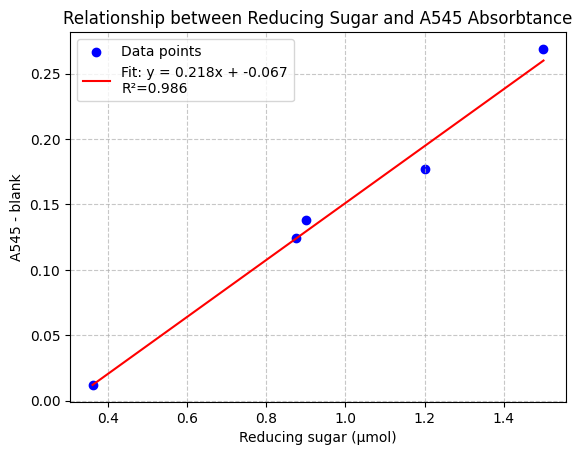

In [58]:
# เตรียมข้อมูลสำหรับ regression
X = df[['reducing_sugar']].values  # independent variable (x)
y = df['A545-blank'].values        # dependent variable (y)

# scatter_x = df[['reducing_sugar']].values 
# scatter_y = df['A545-blank'].values 
# fit linear regression
model = LinearRegression()
model.fit(X, y)

# ค่าความชันและจุดตัดแกน
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

# สร้างเส้น regression
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# plot
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(x_range, y_pred, color='red', label=f'Fit: y = {slope:.3f}x + {intercept:.3f}\nR²={r2:.3f}')
plt.xlabel('Reducing sugar (µmol)')
plt.ylabel('A545 - blank')
plt.title('Relationship between Reducing Sugar and A545 Absorbtance')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

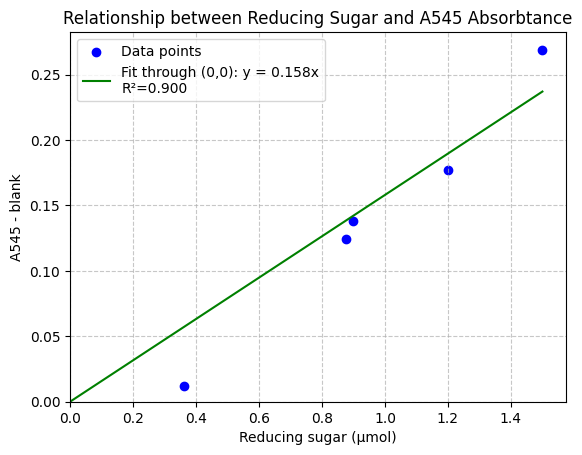

In [64]:
# เตรียมข้อมูล
X = df[['reducing_sugar']].values
y = df['A545-blank'].values

# fit linear regression แบบผ่านจุด (0,0)
model_zero = LinearRegression(fit_intercept=False)
model_zero.fit(X, y)

slope_zero = model_zero.coef_[0]
intercept_zero = 0  # บังคับให้ผ่าน 0
r2_zero = model_zero.score(X, y)

# สร้างเส้น regression
x_range = np.linspace(0, X.max(), 100).reshape(-1, 1)
y_pred_zero = model_zero.predict(x_range)

# plot
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(x_range, y_pred_zero, color='green', label=f'Fit through (0,0): y = {slope_zero:.3f}x\nR²={r2_zero:.3f}')
plt.xlabel('Reducing sugar (µmol)')
plt.ylabel('A545 - blank')
plt.title('Relationship between Reducing Sugar and A545 Absorbtance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

# Function Zone

In [ ]:
def absorbance_to_sugar(absorbance: float) -> float:
        # เตรียมข้อมูล
    X = df[['reducing_sugar']].values
    y = df['A545-blank'].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    intercept = model.intercept_
    """
    Convert absorbance (A545 - blank) to reducing sugar
    using standard curve regression.
    """

    
    intercept = -0.067
    slope = 0.218

    reducing = (absorbance - (intercept)) / slope 

    print(f"Using regression: y = {slope:.3f}x + {intercept:.3f}")
    return reducing


print(f"reducing sugar = {absorbance_to_sugar(0.002)} µmol")

Using regression: y = 0.218x + -0.067
reducing sugar = 0.31651376146788995 µmol


In [67]:
def absorbance_to_sugar(absorbance: float) -> float :
    """
    Convert absorbance (A545 - blank) to reducing sugar
    using standard curve regression.
    """
    return (absorbance/0.158)


print(f"reducing sugar = {absorbance_to_sugar(0.008)} µmol")

reducing sugar = 0.05063291139240506 µmol


In [20]:
def activity(reducing_sugar: float) -> float:
    """
    Convert reducing sugar to enzyme activity
    """
    return reducing_sugar/(2 * 0.5 * 5)

print(f"activity = {activity(0.318)} ")

activity = 0.0636 


In [21]:
def swap_fraction(x: float) -> float:
    """
    Convert fraction to swap fraction
    """
    return 1/x

In [22]:
def delrow_0(df: pd.DataFrame) -> pd.DataFrame:
    """
    Delete row with 0 value in any column
    """
    return df[(df != 0).all(axis=1)]


# LAB2 : Substate

In [86]:
df_lab2 = pd.read_csv('lab2_substance_vs_activity.csv')
# df.index = ['A', 'B', 'C']

df_lab2.columns = ['A545-blank','sucrose(mM)']
df_lab2

#add abs
df_lab2["Reducing_sugar(µmol glu+fru)"] = df_lab2["A545-blank"].apply(absorbance_to_sugar)
#add activity
df_lab2['Activity(U/mL)'] = df_lab2['Reducing_sugar(µmol glu+fru)'].apply(activity)

df_lab2 = delrow_0(df_lab2)
df_lab2

Using regression: y = 0.218x + -0.067
Using regression: y = 0.218x + -0.067
Using regression: y = 0.218x + -0.067
Using regression: y = 0.218x + -0.067
Using regression: y = 0.218x + -0.067


,A545-blank,sucrose(mM),Reducing_sugar(µmol glu+fru),Activity(U/mL)
0,0.008,5,0.344037,0.068807
1,0.107,10,0.798165,0.159633
2,0.262,20,1.509174,0.301835
3,0.443,40,2.339450,0.467890
4,0.707,80,3.550459,0.710092


In [87]:
df_lab2_forplot = df_lab2[['sucrose(mM)', 'Activity(U/mL)']].copy()
df_lab2_forplot['1/sucrose(mM)'] = df_lab2_forplot['sucrose(mM)'].apply(swap_fraction)
df_lab2_forplot['1/Activity(U/mL)'] = df_lab2_forplot['Activity(U/mL)'].apply(swap_fraction)

df_lab2_forplot

,sucrose(mM),Activity(U/mL),1/sucrose(mM),1/Activity(U/mL)
0,5,0.068807,0.2000,14.533333
1,10,0.159633,0.1000,6.264368
2,20,0.301835,0.0500,3.313070
3,40,0.467890,0.0250,2.137255
4,80,0.710092,0.0125,1.408269


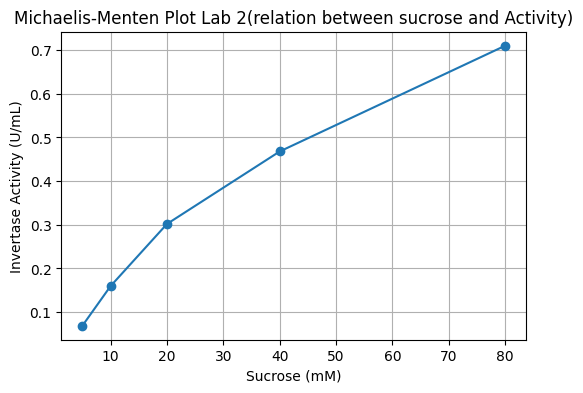

In [92]:
# Plot graph
plt.figure(figsize=(6,4))
plt.plot(df_lab2_forplot["sucrose(mM)"], df_lab2_forplot["Activity(U/mL)"], marker='o')
plt.xlabel("Sucrose (mM)")
plt.ylabel("Invertase Activity (U/mL)")
plt.title("Michaelis-Menten Plot Lab 2(relation between sucrose and Activity)")
plt.grid(True)
plt.show()

In [26]:
df_lab2_forplot["1/sucrose(mM)"].values

array([0.05    , 0.025   , 0.0125  , 0.00625 , 0.003125])

In [90]:
x = df_lab2_forplot['1/sucrose(mM)']
y = df_lab2_forplot['1/Activity(U/mL)']

# ฟิตเส้นตรง y = m x + b
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

Vmax = 1.0 / b
Km = m * Vmax
x_intercept = -1.0 / Km

print(f"slope m = {m:.6g}")
print(f"y-intercept (=1/vmax) = {b:.6g}")
print(f"Vmax = {Vmax:.6g}")
print(f"x-intercept (=-1/Km) = {x_intercept:.6g}")
print(f"Km = {Km:.6g}")

#find R squared
from sklearn.metrics import r2_score
r2_sklearn = r2_score(y, y_pred)
print(f"R^2 (sklearn): {r2_sklearn:.4f}")

slope m = 69.9539
y-intercept (=1/vmax) = 0.109829
Vmax = 9.10502
x-intercept (=-1/Km) = -0.00157003
Km = 636.932
R^2 (sklearn): 0.9892


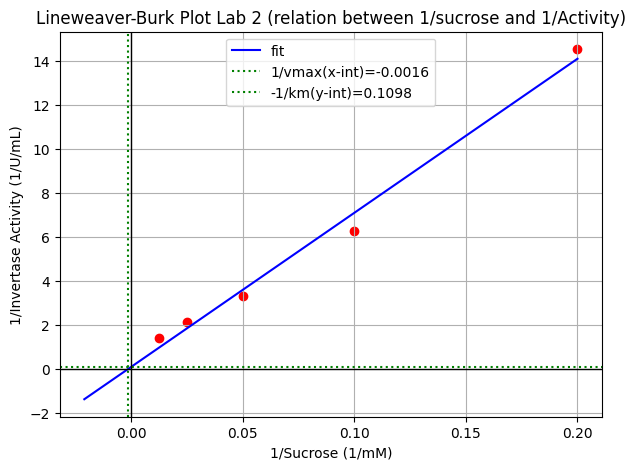

In [91]:
x1 = df_lab2_forplot["1/sucrose(mM)"]
y1 = df_lab2_forplot['1/Activity(U/mL)']


# Fit lines
m1, b1 = np.polyfit(x1, y1, 1)

x_range = np.linspace(-0.021, x1.max(), 100)

y_pred1 = m1 * x_range + b1

x_intercept1 = -1.0 / (m1 * (1.0 / b1))
y_intercept1 = b1

plt.figure(figsize=(7,5))

plt.scatter(x1, y1, color='red', label='')
plt.plot(x_range, y_pred1, color='blue', linestyle='-', label='fit')

plt.axvline(x_intercept1, color='green', linestyle=':', label=f'1/vmax(x-int)={x_intercept1:.4f}')
plt.axhline(y_intercept1, color='green', linestyle=':', label=f'-1/km(y-int)={y_intercept1:.4f}')

plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)

plt.xlabel("1/Sucrose (1/mM)")
plt.ylabel("1/Invertase Activity (1/U/mL)")
plt.title("Lineweaver-Burk Plot Lab 2 (relation between 1/sucrose and 1/Activity)")
plt.legend()
plt.grid(True)
plt.show()

# Lab3

# lab4

In [30]:
# Make df a 3x3 DataFrame with sample values
df_lab4 = pd.DataFrame({
    'pH': [2,5,12],
    'Activity(U/mL)' : [0.079,0.546,0.064]
})
df_lab4

,pH,Activity(U/mL)
0,2,0.079
1,5,0.546
2,12,0.064


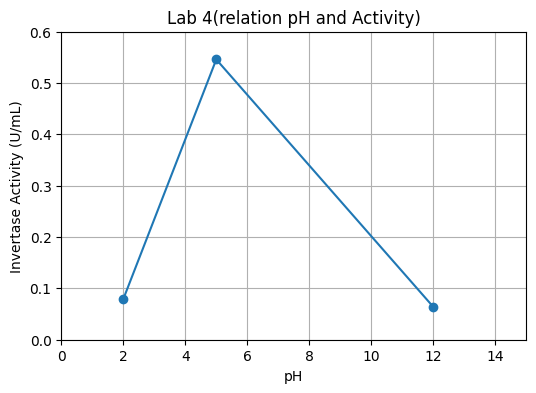

In [31]:
plt.figure(figsize=(6,4))
plt.plot(df_lab4["pH"], df_lab4["Activity(U/mL)"], marker='o')

plt.xlim(0, 15)
plt.ylim(0, 0.6)

plt.xlabel("pH")
plt.ylabel("Invertase Activity (U/mL)")
plt.title("Lab 4(relation pH and Activity)")
plt.grid(True)
plt.show()

# lab 5

In [32]:
df_lab5 = pd.DataFrame({
    'tempurature': [0,25,55,100],
    'Activity(U/mL)' : [0.033,0.07,0.036,0.037]
})
df_lab5

,tempurature,Activity(U/mL)
0,0,0.033
1,25,0.070
2,55,0.036
3,100,0.037


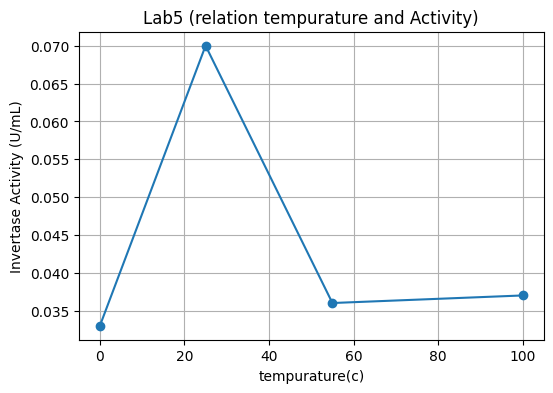

In [33]:
plt.figure(figsize=(6,4))
plt.plot(df_lab5["tempurature"], df_lab5["Activity(U/mL)"], marker='o')

# plt.xlim(0, 15)
# plt.ylim(0, 0.6)

plt.xlabel("tempurature(c)")
plt.ylabel("Invertase Activity (U/mL)")
plt.title("Lab5 (relation tempurature and Activity)")
plt.grid(True)
plt.show()

# Lab 6

In [74]:
def absorbance_to_sugar_lab7(absorbance: float) -> float :
    """
    Convert absorbance (A545 - blank) to reducing sugar
    using standard curve regression.
    """
    return (absorbance/0.2962)


print(f"reducing sugar = {absorbance_to_sugar_lab7(0.008)} µmol")

reducing sugar = 0.02700877785280216 µmol


In [75]:
df_lab6 = pd.read_csv('lab6_inhibitor_no_inhi.csv')

df_lab6.columns = ['A545-blank(no_inhibitor)','A545-blank(with_inhibitor)','sucrose(mM)']
df_lab6

#add reducing sugar
df_lab6["Reducing_sugar_noinhi(µmol)"] = df_lab6["A545-blank(no_inhibitor)"].apply(absorbance_to_sugar_lab7)
df_lab6["Reducing_sugar_withinhi(µmol)"] = df_lab6["A545-blank(with_inhibitor)"].apply(absorbance_to_sugar_lab7)

#add activity
df_lab6['Activity_noinhi(U/mL)'] = df_lab6['Reducing_sugar_noinhi(µmol)'].apply(activity)
df_lab6['Activity_withinhi(U/mL)'] = df_lab6['Reducing_sugar_withinhi(µmol)'].apply(activity)



df_lab6

,A545-blank(no_inhibitor),A545-blank(with_inhibitor),sucrose(mM),Reducing_sugar_noinhi(µmol),Reducing_sugar_withinhi(µmol),Activity_noinhi(U/mL),Activity_withinhi(U/mL)
0,0.13,0.077,5,0.438893,0.259959,0.087779,0.051992
1,0.18,0.130,10,0.607698,0.438893,0.121540,0.087779
2,0.27,0.200,20,0.911546,0.675219,0.182309,0.135044
3,0.35,0.280,40,1.181634,0.945307,0.236327,0.189061
4,0.38,0.320,80,1.282917,1.080351,0.256583,0.216070


In [76]:
df_lab6_forplot = df_lab6[['sucrose(mM)', 'Activity_noinhi(U/mL)', 'Activity_withinhi(U/mL)']].copy()

df_lab6_forplot['1/sucrose(mM)'] = df_lab6_forplot['sucrose(mM)'].apply(swap_fraction)
df_lab6_forplot['1/Activity_noinhi(U/mL)'] = df_lab6_forplot['Activity_noinhi(U/mL)'].apply(swap_fraction)
df_lab6_forplot['1/Activity_withinhi(U/mL)'] = df_lab6_forplot['Activity_withinhi(U/mL)'].apply(swap_fraction)

df_lab6_forplot

,sucrose(mM),Activity_noinhi(U/mL),Activity_withinhi(U/mL),1/sucrose(mM),1/Activity_noinhi(U/mL),1/Activity_withinhi(U/mL)
0,5,0.087779,0.051992,0.2000,11.392308,19.233766
1,10,0.121540,0.087779,0.1000,8.227778,11.392308
2,20,0.182309,0.135044,0.0500,5.485185,7.405000
3,40,0.236327,0.189061,0.0250,4.231429,5.289286
4,80,0.256583,0.216070,0.0125,3.897368,4.628125


In [77]:
def calc_slopes(df):
    """
    Calculate the slope between every two connected sucrose concentrations
    for both 'Activity_noinhi(U/mL)' and 'Activity_withinhi(U/mL)'.
    """
    slopes = {
        'sucrose(mM)_start': [],
        'sucrose(mM)_end': [],
        'slope_noinhi': [],
        'slope_withinhi': []
    }
    sucrose = df['sucrose(mM)'].values
    noinhi = df['Activity_noinhi(U/mL)'].values
    withinhi = df['Activity_withinhi(U/mL)'].values

    for i in range(len(sucrose) - 1):
        dx = sucrose[i+1] - sucrose[i]
        slope_n = (noinhi[i+1] - noinhi[i]) / dx
        slope_w = (withinhi[i+1] - withinhi[i]) / dx
        slopes['sucrose(mM)_start'].append(sucrose[i])
        slopes['sucrose(mM)_end'].append(sucrose[i+1])
        slopes['slope_noinhi'].append(slope_n)
        slopes['slope_withinhi'].append(slope_w)
    return pd.DataFrame(slopes)

df_lab6_michaelis_slope = calc_slopes(df_lab6_forplot)
df_lab6_michaelis_slope

,sucrose(mM)_start,sucrose(mM)_end,slope_noinhi,slope_withinhi
0,5,10,0.006752,0.007157
1,10,20,0.006077,0.004727
2,20,40,0.002701,0.002701
3,40,80,0.000506,0.000675


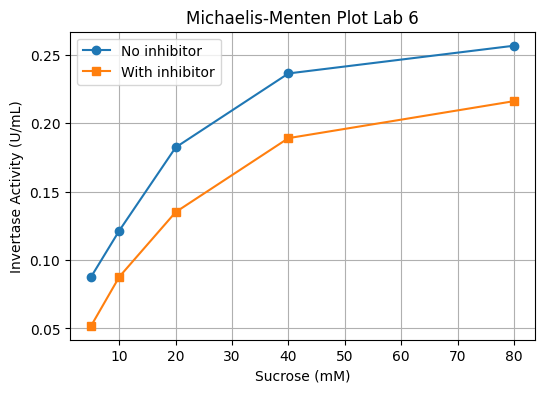

In [81]:


plt.figure(figsize=(6,4))
plt.plot(df_lab6_forplot["sucrose(mM)"], df_lab6_forplot["Activity_noinhi(U/mL)"], marker='o', label='No inhibitor')
plt.plot(df_lab6_forplot["sucrose(mM)"], df_lab6_forplot["Activity_withinhi(U/mL)"], marker='s', label='With inhibitor')
plt.xlabel("Sucrose (mM)")
plt.ylabel("Invertase Activity (U/mL)")
plt.title("Michaelis-Menten Plot Lab 6")
plt.legend()
plt.grid(True)
plt.show()

In [82]:
x = df_lab6_forplot['1/sucrose(mM)']
y = df_lab6_forplot['1/Activity_noinhi(U/mL)']

# ฟิตเส้นตรง y = m x + b
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

Vmax = 1.0 / b
Km = m * Vmax
x_intercept = -1.0 / Km

print(f"slope m = {m:.6g}")
print(f"intercept b = {b:.6g}")
print(f"Vmax = {Vmax:.6g}")
print(f"Km = {Km:.6g}")
print(f"x-intercept (=-1/Km) = {x_intercept:.6g}")

#find R squared
from sklearn.metrics import r2_score
r2_sklearn = r2_score(y, y_pred)
print(f"R^2 (sklearn): {r2_sklearn:.4f}")

slope m = 41.0478
intercept b = 3.46561
Vmax = 0.28855
Km = 11.8443
x-intercept (=-1/Km) = -0.0844287
R^2 (sklearn): 0.9852


In [83]:
x = df_lab6_forplot['1/sucrose(mM)']
y = df_lab6_forplot['1/Activity_withinhi(U/mL)']

# ฟิตเส้นตรง y = m x + b
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

Vmax = 1.0 / b
Km = m * Vmax
x_intercept = -1.0 / Km

print(f"slope m = {m:.6g}")
print(f"intercept b = {b:.6g}")
print(f"Vmax = {Vmax:.6g}")
print(f"Km = {Km:.6g}")
print(f"x-intercept (=-1/Km) = {x_intercept:.6g}")

#find R squared
from sklearn.metrics import r2_score
r2_sklearn = r2_score(y, y_pred)
print(f"R^2 (sklearn): {r2_sklearn:.4f}")


slope m = 78.723
intercept b = 3.48866
Vmax = 0.286643
Km = 22.5654
x-intercept (=-1/Km) = -0.0443157
R^2 (sklearn): 0.9996


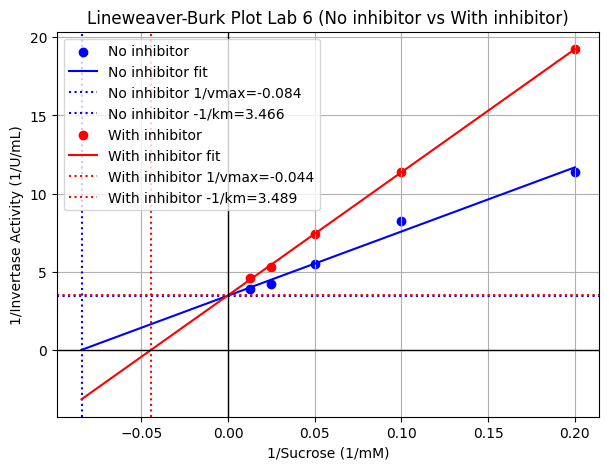

In [85]:
x1 = df_lab6_forplot['1/sucrose(mM)']
y1 = df_lab6_forplot['1/Activity_noinhi(U/mL)']
x2 = df_lab6_forplot['1/sucrose(mM)']
y2 = df_lab6_forplot['1/Activity_withinhi(U/mL)']

# Fit lines
m1, b1 = np.polyfit(x1, y1, 1)
m2, b2 = np.polyfit(x2, y2, 1)

x_range = np.linspace(-0.0844287, max(x1.max(), x2.max()), 100)
y_pred1 = m1 * x_range + b1
y_pred2 = m2 * x_range + b2

x_intercept1 = -1.0 / (m1 * (1.0 / b1))
y_intercept1 = b1
x_intercept2 = -1.0 / (m2 * (1.0 / b2))
y_intercept2 = b2

plt.figure(figsize=(7,5))

plt.scatter(x1, y1, color='blue', label='No inhibitor')
plt.plot(x_range, y_pred1, color='blue', linestyle='-', label='No inhibitor fit')

plt.axvline(x_intercept1, color='blue', linestyle=':', label=f'No inhibitor 1/vmax={x_intercept1:.3f}')
plt.axhline(y_intercept1, color='blue', linestyle=':', label=f'No inhibitor -1/km={y_intercept1:.3f}')

plt.scatter(x2, y2, color='red', label='With inhibitor')
plt.plot(x_range, y_pred2, color='red', linestyle='-', label='With inhibitor fit')

plt.axvline(x_intercept2, color='red', linestyle=':', label=f'With inhibitor 1/vmax={x_intercept2:.3f}')
plt.axhline(y_intercept2, color='red', linestyle=':', label=f'With inhibitor -1/km={y_intercept2:.3f}')

plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)

plt.xlabel("1/Sucrose (1/mM)")
plt.ylabel("1/Invertase Activity (1/U/mL)")
plt.title("Lineweaver-Burk Plot Lab 6 (No inhibitor vs With inhibitor)")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
a = 0.025
b = (a*3*1000) / (0.00622*(10**3)*0.2*1)
b

60.28938906752413